# Optimization (Ch. 7)



In [1]:
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt 



## Golden-Section Search

In [2]:
# example 7.2 
f = lambda x: x**2./10. - 2.*np.sin(x)

xl = 0.
xu = 4.

phi = (1. + np.sqrt(5))/2. # golden ratio

In [3]:
phi - 1
1./phi

np.float64(0.6180339887498948)

In [4]:
d = (phi-1) * (xu - xl)

x1 = xl + d 
x2 = xu - d 
print('x1=',x1)
print('x2=',x2)

print('f(x1)=',f(x1))
print('f(x2)=',f(x2))



x1= 2.4721359549995796
x2= 1.5278640450004204
f(x1)= -0.6299744699822459
f(x2)= -1.7647202482716493


In [5]:
# f(x2) < f(x1)

# this means the minimum is in between [xl, x1]
xu = x1

In [6]:
d = (phi-1) * (xu - xl)

x1 = xl + d 
x2 = xu - d 
print('x1=',x1)
print('x2=',x2)

print('f(x1)=',f(x1))
print('f(x2)=',f(x2))


x1= 1.5278640450004208
x2= 0.9442719099991588
f(x1)= -1.7647202482716495
f(x2)= -1.530975546926476


In [7]:
# f(x2) > f(x1)
# The minimum is contained in the interval [x2,xu]
xl = x2

In [8]:
d = (phi-1) * (xu - xl)

x1 = xl + d 
x2 = xu - d 
print('x1=',x1)
print('x2=',x2)

print('f(x1)=',f(x1))
print('f(x2)=',f(x2))


x1= 1.8885438199983178
x2= 1.5278640450004206
f(x1)= -1.5432233693764972
f(x2)= -1.7647202482716495


In [9]:
def goldmin(f, xl, xu, es=1.e-7, maxit=30):
    phi = (1.+np.sqrt(5))/2.
    d = (phi-1)*(xu-xl)
    x1 = xl + d; f1 = f(x1)
    x2 = xu - d; f2 = f(x2)

    for i in range(maxit):
        xint = xu - xl

        if f1 < f2:
            xopt = x1 
            xl = x2 
            x2 = x1 
            f2 = f1 
            x1 = xl + (phi-1)* (xu - xl)
            f1 = f(x1)
        else:
            xopt = x2 
            xu = x1 
            x1 = x2 
            f1 = f2 
            x2 = xu - (phi-1)*(xu-xl)
            f2 = f(x2)

        if xopt != 0:
            ea = (2-phi)*np.abs(xint/xopt)
            if ea <= es: break 

    return xopt, f(xopt), ea, i+1 



xl = 0.
xu = 4.        
xopt, fxopt, ea, iter = goldmin(f, xl, xu)

In [10]:
# error 
print(2*phi - 3.)
print(2. - phi)

0.2360679774997898
0.3819660112501051


## Parabolic Interpolation

In [11]:
f = lambda x: x**2./10. - 2. * np.sin(x)

x1 = 0.
x2 = 1.
x3 = 4. 

y1 = f(x1)
y2 = f(x2)
y3 = f(x3)

print('y1=',y1)
print('y2=',y2)
print('y3=',y3)



y1= 0.0
y2= -1.582941969615793
y3= 3.1136049906158565


In [12]:
numerator = (x2 - x1)**2. * (y2 - y3) - (x2 - x3)**2. * (y2 - y1)
denominator =(x2 - x1) * (y2 - y3) - (x2 - x3) * (y2 - y1)
  
x4 = x2 - 0.5 * numerator/denominator
print('x4=',x4)
print('y4=', f(x4))

x4= 1.5055348739896623
y4= -1.7690789285139574


In [13]:
# SciPy

from scipy.optimize import minimize_scalar

f = lambda x: x**2./10. - 2.*np.sin(x)

result = minimize_scalar(f)
xmin = result.x 
print(xmin)

1.4275517797083348


In [14]:
# parabolic interpolation
x1 = 0.
x2 = 1.
x3 = 4.
result = minimize_scalar(f,bracket=(x1,x2,x3))
xmin = result.x 
print(xmin)

1.4275517659384476


In [15]:
# parabolic x2 = (x1+x3)/2
x1 = 0.
x3 = 4.
result = minimize_scalar(f,bracket=(x1,x3))
xmin = result.x 
print(xmin)

1.427551781310228


In [16]:
# golden search 
x1 = 0.
x3 = 4.
result = minimize_scalar(f,bracket=(x1,x3),method='golden')
xmin = result.x 
print(xmin)

1.4275517796423967


In [17]:
# golden search 
x1 = 0.
x3 = 4.
result = minimize_scalar(f,bracket=(x1,x3),method='golden',tol=1.e-7,options={'maxiter':20})
xmin = result.x 
print(xmin)

1.4275274919071221


## Multi-dimensional Optimization

In [18]:
# ex 7.4 
# find the minimum in the range x in [-2,0] and y in [0,3]
f = lambda x,y: 2. + x - y + 2*x**2. + 2*x*y + y**2. 

from mpl_toolkits.mplot3d import Axes3D 

x1 = np.linspace(-3, 0, 20)
x2 = np.linspace(0,3,20)
xx,yy = np.meshgrid ( x1,x2)
zz = 2 + xx - yy + 2.*xx**2. + 2.*xx*yy + yy**2.



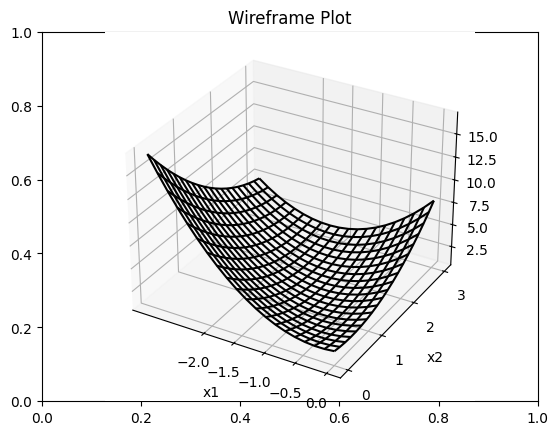

In [19]:
fig = plt.figure()
ax = plt.subplot(111)
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(xx,yy,zz, color='k')
ax.set_xticks([ -2, -1.5, -1, -0.5, 0])
ax.set_yticks([0,1,2,3])
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('Wireframe Plot')
plt.show()

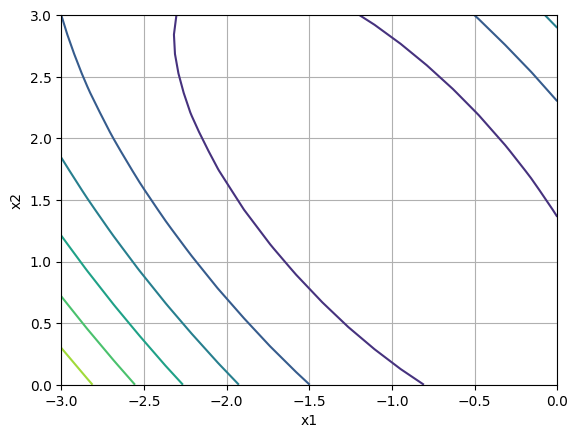

In [20]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.contour(xx,yy,zz)
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.grid()
plt.show()


In [21]:
from scipy.optimize import minimize 

def f(x):
    x1 = x[0]
    x2 = x[1]
    return 2. + x1 - x2 + 2*x1**2. + 2*x1*x2 + x2**2. 

x0 = [-0.5, 0.5]
result = minimize(f, x0, method='Nelder-Mead', options={'disp':False})
xval = result.x 
print(xval)

[-0.99996784  1.49997544]


## Steepest Gradient Method

In [22]:
tol = 1.e-4
x0 = np.array([-2,3])

# maximum number of allowed iterations
maxiter = 1000

# define function and grad functions:
# x is a vector

f = lambda x: 2. + x[0] - x[1] + 2*x[0]**2. + 2*x[0]*x[1] + x[1]**2. 
dfdx = lambda x: np.array([1. + 4.*x[0] + 2*x[1], -1. + 2.*x[0] + 2.*x[1]])

print(f(x0))
print(dfdx(x0))
  

2.0
[-1.  1.]


In [24]:
def LineSearch(f, x, gradf, initial_lr=1.0, shrink_factor=0.5, maxiter=100):
    lr = initial_lr
    for i in range(maxiter):
        next_x = x - lr * gradf
        if f(next_x) < f(x):  
            break  
        lr *= shrink_factor 
    return lr

def SteepestDescent(f, f_grad, x0, tol=1e-5, maxiter=1000,record=False):
    x = np.array(x0)  
    xc = [x]
    
    for i in range(maxiter):
        gradf = f_grad(x)
        alpha = LineSearch(f, x, gradf)
        xp = x - alpha * gradf
        if np.linalg.norm(xp - x) < tol:
            break
        x = xp
        if record == True:
            xc.append(x)
        
    xc.append(x)
    return x, np.array(xc)


In [25]:
xp,xc = SteepestDescent(f, dfdx, x0)
print(xp)
print(xc)

[-1.00001526  1.50001526]
[[-2.          3.        ]
 [-1.00001526  1.50001526]]


[-1.015625  1.515625]
[[-2.        3.      ]
 [-1.        2.      ]
 [-1.25      1.75    ]
 [-1.125     1.75    ]
 [-1.125     1.625   ]
 [-1.0625    1.625   ]
 [-1.0625    1.5625  ]
 [-1.03125   1.5625  ]
 [-1.03125   1.53125 ]
 [-1.015625  1.53125 ]
 [-1.015625  1.515625]
 [-1.015625  1.515625]]


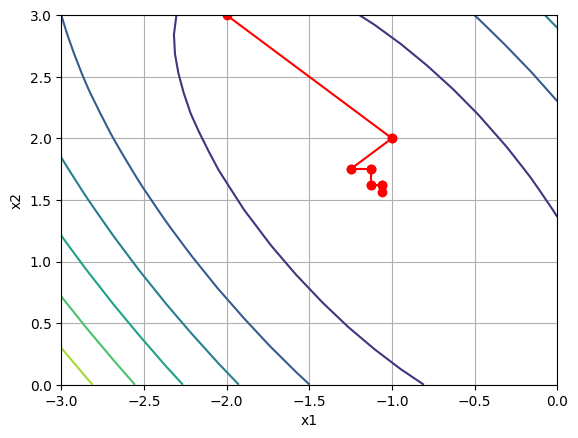

In [26]:
xp,xc = SteepestDescent(f, dfdx, x0,record=True,maxiter=10)
print(xp)
print(xc)

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.contour(xx,yy,zz)
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.grid()
for iter in [0,1,2,3,4,5]:
    # iter = 1
    plt.plot([xc[iter][0], xc[iter+1][0]],[xc[iter][1], xc[iter+1][1]],'ro-')

plt.show()


[7.203125  8.5703125]
[[-2.         3.       ]
 [ 2.25       1.125    ]
 [ 2.75       5.875    ]
 [ 4.875      4.9375   ]
 [ 5.125      7.3125   ]
 [ 6.1875     6.84375  ]
 [ 6.3125     8.03125  ]
 [ 6.84375    7.796875 ]
 [ 6.90625    8.390625 ]
 [ 7.171875   8.2734375]
 [ 7.203125   8.5703125]
 [ 7.203125   8.5703125]]


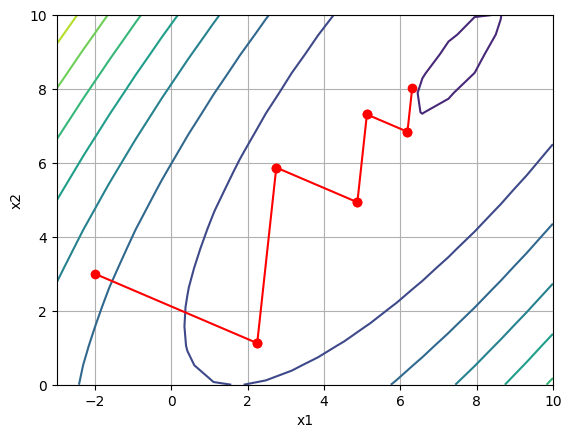

In [29]:
f = lambda x: 3.*x[0]**2. - 10.*x[0] - 4.*x[0]* x[1] + 2.*x[1]**2.- 5.*x[1] + 8.
dfdx = lambda x: np.array([6.*x[0] - 10. -4.*x[1], -4.*x[0] + 4.*x[1]-5.])

xp,xc = SteepestDescent(f, dfdx, x0,record=True,maxiter=10)
print(xp)
print(xc)


x1 = np.linspace(-3, 10, 20)
x2 = np.linspace(0,10,20)
xx,yy = np.meshgrid ( x1,x2)
zz = 3.*xx**2. - 10.*xx - 4.*xx* yy + 2.*yy**2.- 5.*yy + 8.


fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.contour(xx,yy,zz)
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.grid()
for iter in [0,1,2,3,4,5]:
    # iter = 1
    plt.plot([xc[iter][0], xc[iter+1][0]],[xc[iter][1], xc[iter+1][1]],'ro-')

plt.show()

